In [8]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

mouse_data = pd.read_csv(mouse_drug_data_to_load)
trial_data = pd.read_csv(clinical_trial_data_to_load)

# Read the Mouse and Drug Data and the Clinical Trial Data
all_data = pd.merge(mouse_data, trial_data, how="left", on=["Mouse ID", "Mouse ID"])
# Combine the data into a single dataset


# Display the data table for preview
all_data.head()



,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [9]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
mean_tumor_df = all_data.groupby(['Drug', 'Timepoint']).mean()["Tumor Volume (mm3)"]

# Convert to DataFrame
mean_tumor_df = mean_tumor_df.to_frame()

# Preview DataFrame
mean_tumor_df.head()



Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325

In [10]:
mean_tumor_df = mean_tumor_df.reset_index()


In [11]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
sem_tumor_df = all_data.groupby(['Drug', 'Timepoint']).sem()["Tumor Volume (mm3)"]
# Convert to DataFrame
sem_tumor_df = sem_tumor_df.to_frame()
sem_tumor_df = sem_tumor_df.reset_index()
# Preview DataFrame
sem_tumor_df.head()



,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [12]:
# Minor Data Munging to Re-Format the Data Frames
# mean_tumor_df = mean_tumor_df.reset_index()
tumor_vols_pivot_mean = mean_tumor_df.pivot(index="Timepoint", columns="Drug")["Tumor Volume (mm3)"]

#reformatted_df = mean_tumor_df.sort_values("Timepoint", ascending=False)
#reformatted_df = reformatted_df.groupby(["Drug","Timepoint"])
# Preview that Reformatting worked
#reformatted_df.head(2)
tumor_vols_pivot_mean.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


In [13]:
tumor_vols_pivot_sem = sem_tumor_df.pivot(index="Timepoint", columns="Drug")["Tumor Volume (mm3)"]
tumor_vols_pivot_sem.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182


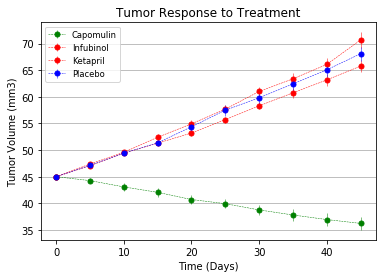

In [25]:
# Generate the Plot (with Error Bars)
# Green drug is working, Blue drug is Placebo.
plt.errorbar(tumor_vols_pivot_mean.index, tumor_vols_pivot_mean["Capomulin"], yerr=tumor_vols_pivot_sem["Capomulin"], color="g", marker="o", markersize=5, linestyle="dashed", linewidth=0.50)
plt.errorbar(tumor_vols_pivot_mean.index, tumor_vols_pivot_mean["Infubinol"], yerr=tumor_vols_pivot_sem["Infubinol"], color="r", marker="o", markersize=5, linestyle="dashed", linewidth=0.50)
plt.errorbar(tumor_vols_pivot_mean.index, tumor_vols_pivot_mean["Ketapril"], yerr=tumor_vols_pivot_sem["Ketapril"], color="r", marker="o", markersize=5, linestyle="dashed", linewidth=0.50)
plt.errorbar(tumor_vols_pivot_mean.index, tumor_vols_pivot_mean["Placebo"], yerr=tumor_vols_pivot_sem["Placebo"], color="b", marker="o", markersize=5, linestyle="dashed", linewidth=0.50)

# Save the Figure
plt.savefig("errorbar.png")
# Show the Figure
plt.title("Tumor Response to Treatment")
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Time (Days)")
plt.grid(axis='y')
plt.legend(['Capomulin', 'Infubinol', 'Ketapril', 'Placebo'],loc="best", fontsize="small", fancybox=True)
plt.show()

In [21]:
# Show the Figure
# plt.show()

![Tumor Response to Treatment](../Images/treatment.png)

## Metastatic Response to Treatment

In [37]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
metastatic_df = all_data.groupby(['Drug', 'Timepoint']).mean()["Metastatic Sites"]
# Convert to DataFrame
metastatic_df = metastatic_df.to_frame()
metastatic_df = metastatic_df.reset_index()
# Preview DataFrame
metastatic_df.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [38]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
metastatic_sem_df = all_data.groupby(['Drug', 'Timepoint']).sem()["Metastatic Sites"]
# Convert to DataFrame
metastatic_sem_df = metastatic_sem_df.to_frame()
metastatic_sem_df = metastatic_sem_df.reset_index()
# Preview DataFrame
metastatic_sem_df.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [39]:
# Minor Data Munging to Re-Format the Data Frames
metastatic_pivot_mean = metastatic_df.pivot(index="Timepoint", columns="Drug")["Metastatic Sites"]

# Preview that Reformatting worked
metastatic_pivot_mean.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


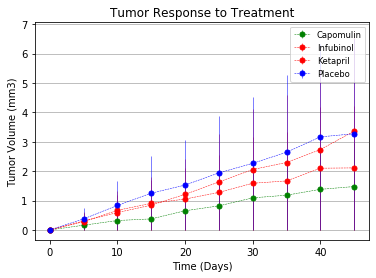

In [44]:
# Generate the Plot (with Error Bars)
plt.errorbar(metastatic_pivot_mean.index, metastatic_pivot_mean["Capomulin"], yerr=metastatic_pivot_mean["Capomulin"], color="g", marker="o", markersize=5, linestyle="dashed", linewidth=0.50)
plt.errorbar(metastatic_pivot_mean.index, metastatic_pivot_mean["Infubinol"], yerr=metastatic_pivot_mean["Infubinol"], color="r", marker="o", markersize=5, linestyle="dashed", linewidth=0.50)
plt.errorbar(metastatic_pivot_mean.index, metastatic_pivot_mean["Ketapril"], yerr=metastatic_pivot_mean["Ketapril"], color="r", marker="o", markersize=5, linestyle="dashed", linewidth=0.50)
plt.errorbar(metastatic_pivot_mean.index, metastatic_pivot_mean["Placebo"], yerr=metastatic_pivot_mean["Placebo"], color="b", marker="o", markersize=5, linestyle="dashed", linewidth=0.50)

# Save the Figure
plt.savefig("errorbarmetastatic.png")
# Show the Figure
plt.title("Tumor Response to Treatment")
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Time (Days)")
plt.grid(axis='y')
plt.legend(['Capomulin', 'Infubinol', 'Ketapril', 'Placebo'],loc="best", fontsize="small", fancybox=True)
plt.show()

![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [ ]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)

# Convert to DataFrame

# Preview DataFrame


,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [ ]:
# Minor Data Munging to Re-Format the Data Frames

# Preview the Data Frame


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


In [ ]:
# Generate the Plot (Accounting for percentages)

# Save the Figure

# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [ ]:
# Calculate the percent changes for each drug

# Display the data to confirm


Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

In [ ]:
# Store all Relevant Percent Changes into a Tuple


# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figure
fig.show()

![Metastatic Spread During Treatment](../Images/change.png)